In [179]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [180]:
class multiclass_logestic_regression():
    def __init__(self, epoch=1000, etha=0.01):
        self.epoch = epoch
        self.etha = etha # learning rate
        self.w = None
        self.accuracy = 0
        self.loss_hist =[]
        
    def softmax(self, z):
        # x(n.m+1) w(m+1.k) k: number of classes
        # x @ w = z --> soft max normalize xw in a row(axis=1) to detect the class
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
    
    def predict_train(self, x):
        return self.softmax(  x @ self.w )
    
    def one_hotter(self, x, y):
        p =self.predict_train(x) #p: probability
        y_onehot = np.zeros_like(p)        # make a zro matrix like p(n.k)
        y_onehot[np.arange(len(y)), y] = 1 # advanced indexing to avoid loop # each row one sample
        return p, y_onehot
    
    def cross_entropy_loss (self, x, y):
        epsilon = 1e-10 #avoid error in log
        p , y_onehot = self.one_hotter(x, y)
        return -np.mean(np.sum(y_onehot * np.log(p+epsilon), axis=1)) # multiplication is element by element
        
    def gradient (self, x, y):
        p , y_onehot = self.one_hotter( x, y)
        errors = p - y_onehot
        gradient = x.T @ errors / len(y)
        return gradient 
    
    def fit(self, x, y, delta_step = 1e-6):
        n, m = x.shape #samples, features
        self.w = np.zeros((m+1 ,np.max(y)+1))
        x = np.c_[np.ones(n), x]
        for ep in range(1, 1+self.epoch):
            grad = self.gradient(x, y)
            self.w -= self.etha * grad
            self.loss_hist.append(self.cross_entropy_loss(x, y))
            if len(self.loss_hist) >2:
                if abs(self.loss_hist[-2] -self.loss_hist[-1] )<delta_step:
                    print(f'model converged at step:\t{ep}')
                    break 

    def predict_val (self, x):
        y_onehot = np.log(self.predict_train(x))
        return np.argmax(y_onehot, axis=1)
    
    def metric(self, y_hat, y):

        cm = confusion_matrix(y, y_hat)
        plt.figure(figsize=(8,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'],
                    yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix')
        plt.show()
    

In [181]:
data = load_iris()
x = data.data
# x = data.data[:, [2, 4]] # separate 3rd and 4th feature
y = data.target  # labels (0, 1, 2 for the three classes)
features = data.feature_names

In [182]:
# import pandas as pd
# df = pd.DataFrame(x, columns=features)
# print(df.describe())
# df = pd.DataFrame(y, columns=['y'])
# print(df.groupby('y').size()) # analize y balanceness
# y values are ok for logestic regression algorithm

In [183]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

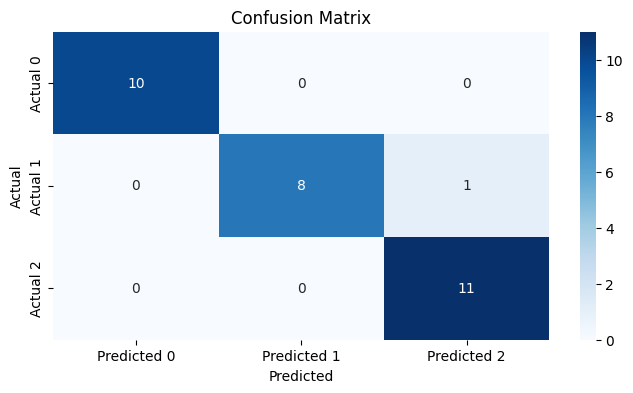

In [184]:
mymodel = multiclass_logestic_regression()
# print(x_train_scaled)
mymodel.fit(x_train_scaled, y_train)
x_test_scaled_ = np.c_[np.ones(x_test_scaled.shape[0]), x_test_scaled]
p ,y_test_onehot = mymodel.one_hotter(x_test_scaled_, y_test)
# print(y_test_onehot)
y_hat_test = mymodel.predict_val(x_test_scaled_)
mymodel.metric(y_hat_test, y_test)
# mymodel.show_metrics()

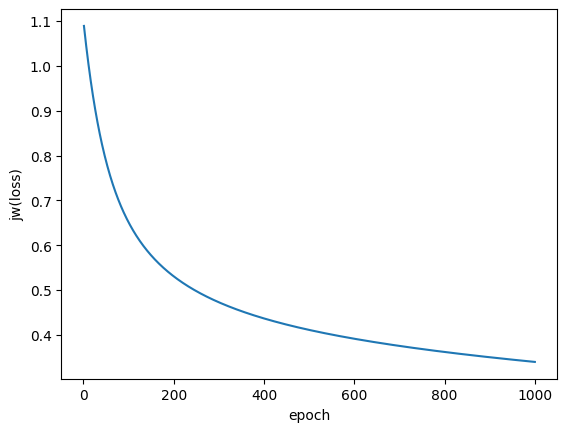

In [185]:
plt.plot(range(1,mymodel.epoch+1), mymodel.loss_hist)
plt.xlabel('epoch')
plt.ylabel('jw(loss)')
plt.show()